In [6]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
from collections import Counter

## 샤넬

In [8]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', sep ='|', encoding = 'utf-8')

In [9]:
mag_ch['word'] = mag_ch['word_chanel']

In [10]:
mag_CH = mag_ch[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

## 제니

### 제니 (유튜브 + 매거진)

In [11]:
tot_je = pd.read_csv('./magazine/final/video_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [12]:
tot_je['word'] = tot_je['word_jenny']

In [13]:
tot_JE = tot_je[['magazine', 'brand', 'title', 'word', 'ADFN', 'ADFN_2']]

In [14]:
len(tot_JE)

351

### 샤넬 + 제니

In [15]:
CHJE = pd.concat([mag_CH, tot_JE])

In [16]:
CHJE.reset_index(drop = True, inplace = True)

In [17]:
CHJE.to_csv('./magazine/final/CHJE.csv', sep = '|', encoding = 'utf-8', index = False)

In [18]:
len(CHJE)

1801

## stopword 추가

In [19]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [20]:
sw_df.columns = ['stopword']

In [21]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [22]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [23]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [24]:
add_0 = ['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고', '거', 
         '내', '더', '개', '사람', '영상', '광고', '언니', '말', '뭐', '수', '생각',
        '있는', '정말', '같은', '같음', '듯', '♡', '완전', '같아', '정도', '지금', '역시', '뭔가', '입니다', '때문', '아니라',
         '함', '같은데', '해', '하는', '할', '넘', '한', '안', '했다', '보면', '데', '하고', '하면', '게', '해서', '봐도', 
         '한다', '된', '건', '요', '움', '임', '애', '하는거', '해도', '보는', '이제', '했는데', '하는데', '하는게', '같아요', 
         '합니다', '하지', '하게', '되는', 'I', '는', '난', '서', '도', '줄', '위', '분', '알', '은', '두', '번', '뒤',
         '이건', '없다', '있어요', '아니고', '있어',
        '계속', '원래', '뭘', '못', '후', '이름', '속', '욕', '옆', '하네', '아님', '그런', '된다', '있음',
        '같', '돼', 'you', '제품', '표현', 'n', '봤는데', '건가', '나오는', '가지', '저런', '보이', '고',
        '중', '사진', '댓글', '부분', '진심', '그녀', '보', '날', '겁나', '요즘', '앞', '워', '이유', '솔직히', '하며', '통해',
        '모든', '항상', '전', '기자', '다시', '오늘', '↑', '이자', '대해']
for w in add_0:
    stop_words.append(w)

In [25]:
add_1 = ['BLACKPINK', '리사', '지수', '로제']
for w in add_1:
    stop_words.append(w)

In [26]:
len(stop_words)

825

In [27]:
CHJE['ADFN_2'] = CHJE['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [28]:
noun_adj_list = []
for i in range(len(CHJE)):
    for word in CHJE.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [29]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 9423), ('CHANEL', 5757), ('귀엽다', 2144), ('예쁘다', 1820), ('브랜드', 1012), ('사랑', 1008), ('KARL', 882), ('모델', 794), ('쇼', 769), ('스타일', 768), ('장식', 748), ('얼굴', 746), ('백', 723), ('옷', 685), ('매력', 684), ('드레스', 681), ('컬러', 673), ('룩', 645), ('무대', 642), ('블랙', 564), ('파리', 563), ('여성', 555), ('노래', 518), ('재킷', 494), ('트위드', 492), ('디자이너', 484), ('디자인', 478), ('COUTURE', 440), ('주얼리', 439), ('아이템', 434), ('코코', 427), ('화이트', 423), ('새로운', 414), ('눈', 411), ('세계', 408), ('잘', 408), ('여자', 407), ('처음', 400), ('느낌', 399), ('아이돌', 395), ('시작', 388), ('하우스', 381), ('걸', 365), ('다양한', 346), ('GABRIELLE', 344), ('공방', 339), ('영화', 338), ('팬', 323), ('젠득', 322), ('럭셔리', 318), ('팬츠', 316), ('완성', 316), ('의상', 316), ('영감', 310), ('분위기', 309), ('머리', 309), ('크루즈', 309), ('많은', 297), ('실력', 294), ('VIRGINIE', 293), ('봄', 287), ('스커트', 285), ('착용', 281), ('프랑스', 280), ('최고', 276), ('디렉터', 275), ('좋은', 274), ('영어', 274), ('한국', 273), ('헤어', 271), ('스타일링', 269), ('슈즈', 269), ('골드', 268), ('가방'

In [30]:
count = Counter(noun_adj_list)

In [31]:
word_list = count.most_common(500)
for v in word_list:
    print(v)

('제니', 9423)
('CHANEL', 5757)
('귀엽다', 2144)
('예쁘다', 1820)
('브랜드', 1012)
('사랑', 1008)
('KARL', 882)
('모델', 794)
('쇼', 769)
('스타일', 768)
('장식', 748)
('얼굴', 746)
('백', 723)
('옷', 685)
('매력', 684)
('드레스', 681)
('컬러', 673)
('룩', 645)
('무대', 642)
('블랙', 564)
('파리', 563)
('여성', 555)
('노래', 518)
('재킷', 494)
('트위드', 492)
('디자이너', 484)
('디자인', 478)
('COUTURE', 440)
('주얼리', 439)
('아이템', 434)
('코코', 427)
('화이트', 423)
('새로운', 414)
('눈', 411)
('세계', 408)
('잘', 408)
('여자', 407)
('처음', 400)
('느낌', 399)
('아이돌', 395)
('시작', 388)
('하우스', 381)
('걸', 365)
('다양한', 346)
('GABRIELLE', 344)
('공방', 339)
('영화', 338)
('팬', 323)
('젠득', 322)
('럭셔리', 318)
('팬츠', 316)
('완성', 316)
('의상', 316)
('영감', 310)
('분위기', 309)
('머리', 309)
('크루즈', 309)
('많은', 297)
('실력', 294)
('VIRGINIE', 293)
('봄', 287)
('스커트', 285)
('착용', 281)
('프랑스', 280)
('최고', 276)
('디렉터', 275)
('좋은', 274)
('영어', 274)
('한국', 273)
('헤어', 271)
('스타일링', 269)
('슈즈', 269)
('골드', 268)
('가방', 267)
('첫', 262)
('링', 259)
('핑크', 256)
('여름', 255)
('패션', 255)
('클래식', 2

In [32]:
top500 = pd.DataFrame(word_list)

In [33]:
top500.columns = ['word', 'count']

In [34]:
top500.to_csv('./CHJE_top500.csv', sep='|', encoding = 'utf-8', index = False)

## 워드클라우드 만들기

In [59]:
import matplotlib.pyplot as plt

In [60]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [61]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [62]:
from wordcloud import WordCloud

In [63]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

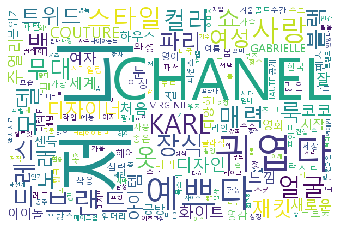

In [64]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('CHJE_total.png')

In [71]:
CHJE.to_csv('./magazine/final/CHJE_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)